# Représenter l'évolution et les types de dépôts dans HAL du portail HAL-ENS

Import de bibliothèque

In [1]:
import pandas as pd, json, requests

Définition des fonctions

In [5]:
def req_hal(year, subtype) :
    """nombre de publication pour telle année pour tel type de dépôt"""
    req = requests.get(f"https://api.archives-ouvertes.fr/search/ens/?q=submittedDateY_i:{year}&fq=submitType_s:{subtype}&rows=0")
    req = req.json()
    num = req['response']['numFound']
    return num

In [42]:
def req_total(year, st) :
    """nombre de publication pour telle année"""
    req = requests.get(f"https://api.archives-ouvertes.fr/search/ens/?q=submittedDateY_i:{year}&rows=0")
    req = req.json()
    tot = req['response']['numFound']
    return tot

Détermination de la période

In [118]:
year1 = int (input("Année de départ : "))
year2 = int (input("Année de fin : "))

Année de départ : 2001
Année de fin : 2016


Calculs des statistiques

In [124]:
totaux = {}
subtypes = ["total"]
for year in range(year1, year2+1):
    totaux[year] = {}
    for st in subtypes :
        tot = req_total(year, st)
        totaux[year][st] = tot

In [ ]:
data = {}
subtypes = ["file", "notice", "annex"]
for year in range(year1, year2+1):
    data[year] = {}
    for st in subtypes : 
        num = req_hal(year, st)
        data[year][st] = num

Transformation en tableau et graphes

In [121]:
dftot = pd.DataFrame.from_dict(totaux)
df = pd.DataFrame.from_dict(data)
dffin = [df, dftot]
dffin = pd.concat(dffin)
dffin

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
file,7,212,146,242,200,615,460,506,524,547,928,613,635,788,1077,1278
notice,0,0,3,220,358,694,969,913,1174,856,983,2731,2939,1292,1306,1376
annex,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,19
total,7,212,149,462,558,1309,1429,1419,1698,1403,1911,3344,3574,2081,2394,2673


<AxesSubplot:>

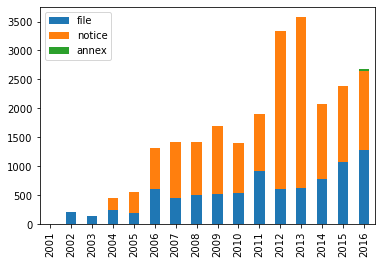

In [122]:
df = df.T # pour inverser colonnes et lignes
df.plot.bar(stacked = True)